In [1]:
import numpy as np
import keras
from keras.datasets import mnist
import math

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
for a in range(len(y_train)):
    if (y_train[a]==y_train[0]):
        y_train[a]=1
    else:
        y_train[a]=0

In [5]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

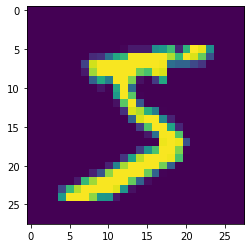

In [7]:
#uses matplotlib to display values stored in mnist_data.
import matplotlib.pyplot as plt
image=x_train[0]
plt.imshow(image)                                     
plt.show()                                               

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
from sklearn.model_selection import GridSearchCV

In [9]:
num_classes = 10

In [10]:
img_rows, img_cols = 28, 28

In [11]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000,)

In [14]:
y_train.argmax(axis=0)

0

In [15]:
x_train.size

47040000

In [16]:
x_train.ndim

4

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
#array of size 60k containing flattened image pixels
f_img_array = [item.flatten() for item in x_train]

In [20]:
#array of weights initialized to zero

weights = np.asarray([0.0 for count in range(x_train.shape[1] * x_train.shape[2] + 1)])
weights.shape = (weights.shape[0], 1)
weights.shape

(785, 1)

In [22]:
#array of randomly initialized weights 

weights2 = np.random.randn(x_train.shape[1]*x_train.shape[2]+1,1)
weights2.shape

(785, 1)

In [23]:
def w_sum(image, weight):
    image2=image.flatten()
    wgt_sum=0
    wgt_sum+=weight[0]
    for i in range (len(image2)):
        wgt_sum += (weight[i+1] * (image2[i]))
        
    return wgt_sum

In [24]:
def total_w_sum(image_array, weight):
    lenth=len(image_array)

    t_w_sum = np.arange(lenth, dtype=float)

    for i in range(len(image_array)):
        t_w_sum[i] = w_sum(image_array[i], weight)
        
    return t_w_sum

In [25]:
def activate_func(value):
    if value > 500:
        value = 500
    if value < -500:
        value = -500
    out_value=0
    out_value=1/(1+math.exp(-1 * value))
    return out_value

In [26]:
def t_activation(in_array):
    activ_array = np.asarray([0.0 for count in range(len(in_array))])
    
    for b in range(len(in_array)):
        value=activate_func(in_array[b])
        if (value>0.7):
            activ_array[b]=1
        else:
            activ_array[b]=0
        
    return activ_array

In [27]:
# t_activation(output)

In [28]:
def loss_func(learn_rate, image, expected, predicted, weights_array):
    
    error=np.asarray([0.0 for count in range(len(weights_array))])
    diff=expected-predicted                      
    
    error[0]=learn_rate*diff                     #error for bias term is calculated using a weighted sum of 1
    for j in range(1, len(weights_array)):       
            error[j]=learn_rate*diff*image[j-1]  
    
    for t in range(len(weights_array)):
        weights_array[t]+=error[t]               #updating the weights for every pixel in image

In [29]:
def t_loss_func(learn_rate, images_arr, expected_arr, predicted_array, weights_array):
    
    for i in range(0, len(predicted_array)):   
        loss_func(learn_rate, images_arr[i], expected_arr[i], predicted_array[i], weights_array)
    
    for t in range(len(weights_array)):       
        print(weights_array[t])                  #updated weights array after 1 epoch

In [30]:
def main():
    for i in range(5):
        output=np.array([])
        output = total_w_sum(x_train, weights2)
        t_loss_func(0.001, f_img_array, y_train, t_activation(output), weights2)
        print('End of epoch {}\n\n'.format(i))

In [31]:
main()

[-49.62483339]
[-1.02417725]
[-0.36946925]
[1.64473599]
[-0.49792401]
[-1.63617853]
[-0.38683811]
[2.04838788]
[2.26081528]
[1.1389107]
[0.61203916]
[0.02986119]
[1.0871899]
[0.76232729]
[0.7744602]
[-1.20107319]
[0.74849936]
[0.28856775]
[2.29380731]
[-0.84201395]
[-1.7173123]
[2.57228702]
[-0.72821619]
[-0.33727356]
[-0.54570311]
[-0.45076589]
[-0.04759499]
[-0.17500759]
[-2.06420517]
[0.6449223]
[0.1804939]
[1.32299239]
[-0.14853234]
[0.14295674]
[0.11065259]
[-0.79986999]
[1.56887219]
[0.96060441]
[0.34274855]
[0.43575539]
[-2.57374013]
[-1.05293081]
[0.71881956]
[-0.12187832]
[-0.958473]
[-1.41468282]
[0.20231769]
[2.04362582]
[0.43850543]
[0.54041842]
[0.7797636]
[0.0353738]
[0.11000936]
[-0.1003869]
[-0.3263795]
[0.70974469]
[0.23707887]
[1.72869252]
[0.44977558]
[-0.05175782]
[1.14488267]
[1.39195786]
[1.01590005]
[-1.67385353]
[-1.07764917]
[0.99504068]
[-0.20690911]
[-0.87869951]
[-1.62494554]
[-2.72280823]
[1.43721011]
[0.02104264]
[-1.29436854]
[-0.43820595]
[1.05154259]
[-

[-42.88183339]
[-1.02417725]
[-0.36946925]
[1.64473599]
[-0.49792401]
[-1.63617853]
[-0.38683811]
[2.04838788]
[2.26081528]
[1.1389107]
[0.61203916]
[0.02986119]
[1.0871899]
[0.76232729]
[0.7744602]
[-1.20107319]
[0.74849936]
[0.28856775]
[2.29380731]
[-0.84201395]
[-1.7173123]
[2.57228702]
[-0.72821619]
[-0.33727356]
[-0.54570311]
[-0.45076589]
[-0.04759499]
[-0.17500759]
[-2.06420517]
[0.6449223]
[0.1804939]
[1.32299239]
[-0.14853234]
[0.14295674]
[0.11065259]
[-0.79986999]
[1.56887219]
[0.96060441]
[0.34274855]
[0.43575539]
[-2.57374013]
[-1.05293081]
[0.71881956]
[-0.12065479]
[-0.95648084]
[-1.41440439]
[0.20231769]
[2.04362582]
[0.43850543]
[0.54041842]
[0.7797636]
[0.0353738]
[0.11000936]
[-0.1003869]
[-0.3263795]
[0.70974469]
[0.23707887]
[1.72869252]
[0.44977558]
[-0.05175782]
[1.14488267]
[1.39195786]
[1.01590005]
[-1.67385353]
[-1.07764917]
[0.99504068]
[-0.20690911]
[-0.87836225]
[-1.62427887]
[-2.72159647]
[1.44177874]
[0.02891715]
[-1.28358422]
[-0.43178634]
[1.05342887]


[-36.13883339]
[-1.02417725]
[-0.36946925]
[1.64473599]
[-0.49792401]
[-1.63617853]
[-0.38683811]
[2.04838788]
[2.26081528]
[1.1389107]
[0.61203916]
[0.02986119]
[1.0871899]
[0.76232729]
[0.7744602]
[-1.20107319]
[0.74849936]
[0.28856775]
[2.29380731]
[-0.84201395]
[-1.7173123]
[2.57228702]
[-0.72821619]
[-0.33727356]
[-0.54570311]
[-0.45076589]
[-0.04759499]
[-0.17500759]
[-2.06420517]
[0.6449223]
[0.1804939]
[1.32299239]
[-0.14853234]
[0.14295674]
[0.11065259]
[-0.79986999]
[1.56887219]
[0.96060441]
[0.34274855]
[0.43575539]
[-2.57374013]
[-1.05293081]
[0.71881956]
[-0.11943126]
[-0.95448869]
[-1.41412596]
[0.20231769]
[2.04362582]
[0.43850543]
[0.54041842]
[0.7797636]
[0.0353738]
[0.11000936]
[-0.1003869]
[-0.3263795]
[0.70974469]
[0.23707887]
[1.72869252]
[0.44977558]
[-0.05175782]
[1.14488267]
[1.39195786]
[1.01590005]
[-1.67385353]
[-1.07764917]
[0.99504068]
[-0.20690911]
[-0.878025]
[-1.6236122]
[-2.7203847]
[1.44634737]
[0.03679166]
[-1.27279991]
[-0.42536674]
[1.05531514]
[-0.

[-29.39583339]
[-1.02417725]
[-0.36946925]
[1.64473599]
[-0.49792401]
[-1.63617853]
[-0.38683811]
[2.04838788]
[2.26081528]
[1.1389107]
[0.61203916]
[0.02986119]
[1.0871899]
[0.76232729]
[0.7744602]
[-1.20107319]
[0.74849936]
[0.28856775]
[2.29380731]
[-0.84201395]
[-1.7173123]
[2.57228702]
[-0.72821619]
[-0.33727356]
[-0.54570311]
[-0.45076589]
[-0.04759499]
[-0.17500759]
[-2.06420517]
[0.6449223]
[0.1804939]
[1.32299239]
[-0.14853234]
[0.14295674]
[0.11065259]
[-0.79986999]
[1.56887219]
[0.96060441]
[0.34274855]
[0.43575539]
[-2.57374013]
[-1.05293081]
[0.71881956]
[-0.11820773]
[-0.95249653]
[-1.41384752]
[0.20231769]
[2.04362582]
[0.43850543]
[0.54041842]
[0.7797636]
[0.0353738]
[0.11000936]
[-0.1003869]
[-0.3263795]
[0.70974469]
[0.23707887]
[1.72869252]
[0.44977558]
[-0.05175782]
[1.14488267]
[1.39195786]
[1.01590005]
[-1.67385353]
[-1.07764917]
[0.99504068]
[-0.20690911]
[-0.87768774]
[-1.62294554]
[-2.71917294]
[1.450916]
[0.04466617]
[-1.2620156]
[-0.41894713]
[1.05720142]
[-0

[-22.65283339]
[-1.02417725]
[-0.36946925]
[1.64473599]
[-0.49792401]
[-1.63617853]
[-0.38683811]
[2.04838788]
[2.26081528]
[1.1389107]
[0.61203916]
[0.02986119]
[1.0871899]
[0.76232729]
[0.7744602]
[-1.20107319]
[0.74849936]
[0.28856775]
[2.29380731]
[-0.84201395]
[-1.7173123]
[2.57228702]
[-0.72821619]
[-0.33727356]
[-0.54570311]
[-0.45076589]
[-0.04759499]
[-0.17500759]
[-2.06420517]
[0.6449223]
[0.1804939]
[1.32299239]
[-0.14853234]
[0.14295674]
[0.11065259]
[-0.79986999]
[1.56887219]
[0.96060441]
[0.34274855]
[0.43575539]
[-2.57374013]
[-1.05293081]
[0.71881956]
[-0.1169842]
[-0.95050437]
[-1.41356909]
[0.20231769]
[2.04362582]
[0.43850543]
[0.54041842]
[0.7797636]
[0.0353738]
[0.11000936]
[-0.1003869]
[-0.3263795]
[0.70974469]
[0.23707887]
[1.72869252]
[0.44977558]
[-0.05175782]
[1.14488267]
[1.39195786]
[1.01590005]
[-1.67385353]
[-1.07764917]
[0.99504068]
[-0.20690911]
[-0.87735049]
[-1.62227887]
[-2.71796118]
[1.45548462]
[0.05254068]
[-1.25123128]
[-0.41252752]
[1.05908769]
[

In [ ]:
weights2.shape

In [ ]:
weights3=np.delete(weights2, 0)  #delete a particular index (0) of the array.
weights3=weights3.reshape((28,28))

In [ ]:
plt.imshow(weights3) #display one image out of the other.